### ASSIGNMENT 4

In [4]:
# importing used libraries
import numpy as np
import pandas as pdskplt.metrics.plot_ks_statistic(df['Wine_strength'], pred.T)
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1) Linear Regression

In [5]:
# loading the dataset
wine_data = pd.read_csv(r"C:\Users\Michal\Documents\GitHub\StatisticsProjectGroupH\Project2\data\wines_properties.csv", header=0 , skiprows=0)
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
# creating dummies for binary customer segment column
dummies = pd.get_dummies(wine_data["Customer_Segment"], prefix = "Customer_Segment")

In [7]:
# joining the datasets
wine_data = wine_data.join(dummies.loc[:,"Customer_Segment_2":])

In [8]:
# dropping the original column
wine_data = wine_data.drop("Customer_Segment", axis = 1)
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment_2,Customer_Segment_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


In [9]:
# Preparation of data for the model
Y = wine_data["Alcohol"]
X = wine_data.loc[:,"Malic_Acid":]
X = sm.add_constant(X, prepend=False)

In [10]:
# fitting of OLS
mod = sm.OLS(Y, X).fit()

In [60]:
# Printing summary statistics
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     22.89
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           1.52e-31
Time:                        15:01:47   Log-Likelihood:                -118.20
No. Observations:                 178   AIC:                             266.4
Df Residuals:                     163   BIC:                             314.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Malic_Acid               0.0745 

## 2) Logistic Regression

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7F1B70F60>]],
      dtype=object)

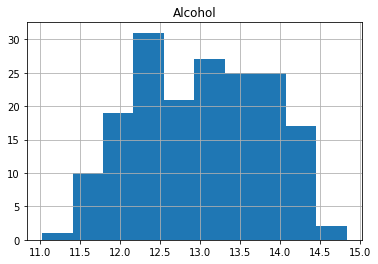

In [12]:
# looking at the distribution of dependent variable
wine_data.hist("Alcohol")

In [13]:
wine_data.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment_2,Customer_Segment_3
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.398876,0.269663
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.491049,0.445037
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,0.000000,0.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,1.000000,1.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,1.000000,1.000000


In [14]:
# setting arbitrary threshold 13.6
wine_data['Strength'] = np.where(wine_data['Alcohol']>=13.6, 1, 0)

In [15]:
# Dropping the original column
wine_data['intercept'] = 1.0
data = wine_data.drop("Alcohol", axis = 1)
data.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment_2,Customer_Segment_3,Strength,intercept
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0,1,1.0
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0,0,1.0
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0,0,1.0
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0,1,1.0
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0,0,1.0


In [16]:
# Preparation of data for fitting
current_var = wine_data.columns.tolist()
logistic_data =['Strength',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline',
 'intercept',
 'Customer_Segment_2',
 'Customer_Segment_3']
data = data[logistic_data]
data.head()

,Strength,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,intercept,Customer_Segment_2,Customer_Segment_3
0,1,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1.0,0,0
1,0,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1.0,0,0
2,0,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1.0,0,0
3,1,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1.0,0,0
4,0,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.0,0,0


In [17]:
# Printing names of columns for further usage
ind_var = data.columns[1:17]
ind_var

Index(['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
       'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline', 'intercept',
       'Customer_Segment_2', 'Customer_Segment_3'],
      dtype='object')

In [18]:
# Fitting the regression
logit = sm.Logit(data["Strength"], data[ind_var])

In [19]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.318429
         Iterations 8


In [20]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.459     
Dependent Variable:    Strength          AIC:               143.3607  
Date:                  2018-12-12 13:42  BIC:               191.0875  
No. Observations:      178               Log-Likelihood:    -56.680   
Df Model:              14                LL-Null:           -104.74   
Df Residuals:          163               LLR p-value:       2.6115e-14
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
Malic_Acid             0.7963   0.3299  2.4139 0.0158   0.1497  1.4429
Ash                   -0.4046   1.4830 -0.2728 0.7850  -3.3111  2.5020
Ash_Alcanity          -0.1211   0.1261 -0.9605 0.3368  -0.3683  0.1260
Magnesium             -0.0174   0.0246 -0.7090 0.4783  -0.0655  0.0307
Total_Phenols          1.7637   1.0456  1.6868 0.0916  -0.2856  3.8130
Flavanoids             0.1078   1.0286  0.1048 0.9165  -1.9081  2.1237
Nonflavanoid_Phenols   0.5048   3.2619  0.1548 0.8770  -5.8884  6.8980
Proanthocyanins       -1.2858   0.8099 -1.5876 0.1124  -2.8731  0.3016
Color_Intensity        0.7868   0.2686  2.9289 0.0034   0.2603  1.3133
Hue                    8.5526   2.6106  3.2761 0.0011   3.4359 13.6692
OD280                  1.1993   0.8031  1.4933 0.1354  -0.3748  2.7734
Proline                0.0006   0.0016  0.3521 0.7247  -0.0026  0.0037
intercept            -16.7840   5.5746 -3.0108 0.0026 -27.7099 -5.8580
Customer_Segment_2    -2.4306   1.5222 -1.5968 0.1103  -5.4141  0.5528
Customer_Segment_3     1.6249   2.4489  0.6635 0.5070  -3.1749  6.4246
======================================================================

"""

C:\Users\Michal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


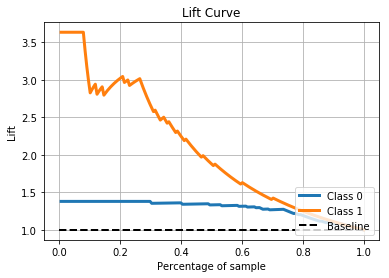

In [21]:
# Plotting evaluation statistics for the performance of the model
import scikitplot as skplt

pred = np.array([1-result.predict(), result.predict()])
#lift curve
skplt.metrics.plot_lift_curve(data["Strength"], pred.T)

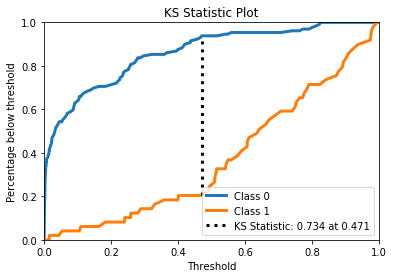

In [22]:
skplt.metrics.plot_ks_statistic(data['Strength'], pred.T)

C:\Users\Michal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


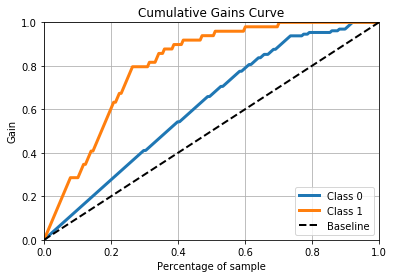

In [27]:
skplt.metrics.plot_cumulative_gain(data['Strength'], pred.T)

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


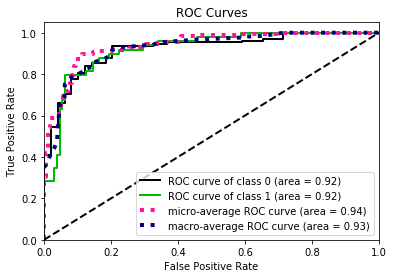

In [23]:
skplt.metrics.plot_roc_curve(data['Strength'], pred.T)

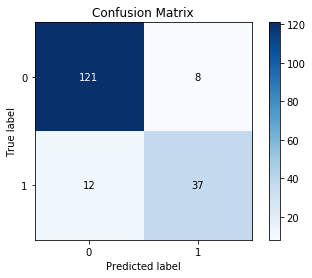

In [25]:
skplt.metrics.plot_confusion_matrix(data['Strength'], result.predict() > 0.5)

## 3) Alternative 1 - PCA from scratch 

In [30]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler().fit_transform(data[ind_var])

In [31]:
# Calculating necessary mean of Xs
mean_vector = np.mean(X_s, axis = 0)

In [32]:
N = X_s.shape[0]

In [33]:
# Creating covariance matrix
covariance_matrix = np.cov(X_s.T)

In [34]:
# Extracting eigen vectors and values
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [35]:
u, s, v = np.linalg.svd(X_s.T)

In [36]:
# Calculating the total number of eigen vectors
tot_eig_vals = sum(eigen_values)
tot_eig_vals

14.079096045197758

In [37]:
sorted_eigenvalues = sorted(eigen_values, reverse=True)

In [38]:
# Calculating the explained variance
variance_explained = [ (i / tot_eig_vals)*100 for i in sorted_eigenvalues ]
variance_explained

[38.43197501268593,
 20.40738494015484,
 10.272104553461453,
 6.592361275979068,
 5.911230407366381,
 4.7016928711750925,
 3.996926077815794,
 2.419527090378865,
 1.895223449931948,
 1.6740948284051018,
 1.4188357317933724,
 1.2455528453305773,
 0.71292274745292,
 0.3201681680686389,
 0.0]

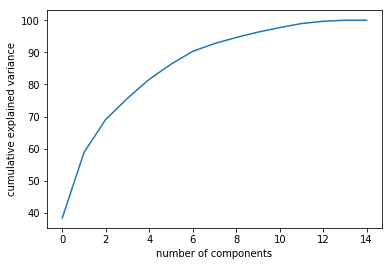

In [39]:
# Plotting number of components against the explained variance
plt.plot(np.cumsum(variance_explained))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## 3) Alternative 2 - Skitlearn decomposition

In [40]:
ind_var

Index(['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
       'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline', 'intercept',
       'Customer_Segment_2', 'Customer_Segment_3'],
      dtype='object')

In [41]:
# Performing preimplemented PCA 
x = StandardScaler().fit_transform(data[ind_var])
pca = PCA(0.75)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
pca_df = pd.concat([principalDf, data[['Strength']]], axis = 1)
pca_var = pca_df.columns[0:-1]
pca_logit = sm.Logit(pca_df["Strength"], pca_df[pca_var])
pca_result = logit.fit()
pca_result.summary2()


Optimization terminated successfully.
         Current function value: 0.318429
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.459     
Dependent Variable:    Strength          AIC:               143.3607  
Date:                  2018-12-12 14:02  BIC:               191.0875  
No. Observations:      178               Log-Likelihood:    -56.680   
Df Model:              14                LL-Null:           -104.74   
Df Residuals:          163               LLR p-value:       2.6115e-14
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
Malic_Acid             0.7963   0.3299  2.4139 0.0158   0.1497  1.4429
Ash                   -0.4046   1.4830 -0.2728 0.7850  -3.3111  2.5020
Ash_Alcanity          -0.1211   0.1261 -0.9605 0.3368  -0.3683  0.1260
Magnesium             -0.0174   0.0246 -0.7090 0.4783  -0.0655  0.0307
Total_Phenols          1.7637   1.0456  1.6868 0.0916  -0.2856  3.8130
Flavanoids             0.1078   1.0286  0.1048 0.9165  -1.9081  2.1237
Nonflavanoid_Phenols   0.5048   3.2619  0.1548 0.8770  -5.8884  6.8980
Proanthocyanins       -1.2858   0.8099 -1.5876 0.1124  -2.8731  0.3016
Color_Intensity        0.7868   0.2686  2.9289 0.0034   0.2603  1.3133
Hue                    8.5526   2.6106  3.2761 0.0011   3.4359 13.6692
OD280                  1.1993   0.8031  1.4933 0.1354  -0.3748  2.7734
Proline                0.0006   0.0016  0.3521 0.7247  -0.0026  0.0037
intercept            -16.7840   5.5746 -3.0108 0.0026 -27.7099 -5.8580
Customer_Segment_2    -2.4306   1.5222 -1.5968 0.1103  -5.4141  0.5528
Customer_Segment_3     1.6249   2.4489  0.6635 0.5070  -3.1749  6.4246
======================================================================

"""

In [42]:
pca.explained_variance_ratio_

array([0.38431975, 0.20407385, 0.10272105, 0.06592361])

In [50]:
# Fitting the logistic regression with PCA components
pca_logit = sm.Logit(pca_df["Strength"], pca_df[pca_var])
pca_result = pca_logit.fit()
pca_result.summary2()

Optimization terminated successfully.
         Current function value: 0.541729
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.079     
Dependent Variable: Strength         AIC:              200.8556  
Date:               2018-12-12 14:06 BIC:              213.5827  
No. Observations:   178              Log-Likelihood:   -96.428   
Df Model:           3                LL-Null:          -104.74   
Df Residuals:       174              LLR p-value:      0.00084224
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
0     -0.2583      0.0746    -3.4631    0.0005    -0.4045    -0.1121
1     -0.6680      0.1163    -5.7448    0.0000    -0.8958    -0.4401
2     -0.2012      0.1447    -1.3905    0.1644    -0.4849     0.0824
3     -0.0598      0.1803    -0.3319    0.7400    -0.4132     0.2935
=================================================================

"""

C:\Users\Michal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


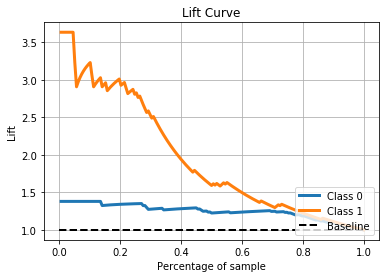

In [51]:
# Plotting the performance characteristics of the model
pred2 = np.array([1-pca_result.predict(), pca_result.predict()])
skplt.metrics.plot_lift_curve(pca_df["Strength"], pred2.T)

C:\Users\Michal\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


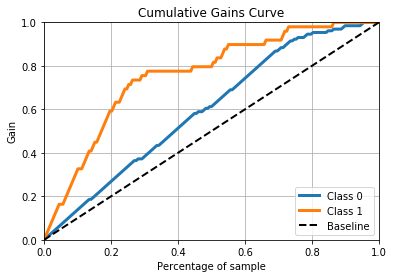

In [58]:
skplt.metrics.plot_cumulative_gain(pca_df['Strength'], pred2.T)

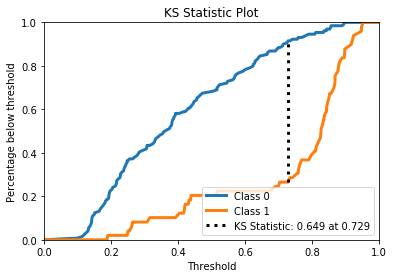

In [52]:
skplt.metrics.plot_ks_statistic(pca_df["Strength"], pred2.T)

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


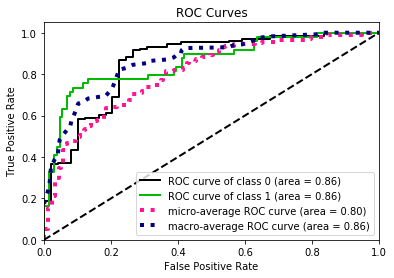

In [54]:
skplt.metrics.plot_roc_curve(pca_df["Strength"], pred2.T)

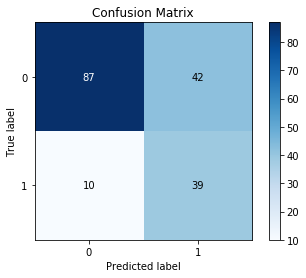

In [56]:
skplt.metrics.plot_confusion_matrix(pca_df['Strength'], pca_result.predict() > 0.5)